In [ ]:
### prepare NBA players list and label
### scrape NBA players' college data from basketball reference

In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests

### Extract NBA player's list and VORP data

In [3]:
player_info = defaultdict(list)
#VORP = np.array([])
tables = []
for i in range(28):
    year = str(2017 - i)
    file = 'Dataset/NBA/' + year + '.csv'
    df = pd.read_csv(file)
    tables.append(df)
    for idx in range(len(df['Player'].values)):
        player_info[df['Player'].values[idx]].append((int(year), float(df.iloc[idx, -1])))
    #VORP = np.append(VORP, df['VORP▼'].values)

In [4]:
player_VORP = defaultdict(float)
for player in player_info:
    info = player_info[player]
    s, count = 0.0, 0.0
    for t in info:
        s += t[1]
        count += 1
    player_VORP[player] = float(s / count)

In [5]:
label = sorted(player_VORP.items(), key=lambda x: x[1], reverse=True)

In [6]:
df = pd.read_csv('Dataset/NBA/2017.csv')

In [7]:
player_info

defaultdict(list,
            {'Mark Acres\\acresma01': [(1993, -0.2),
              (1992, -0.1),
              (1991, 0.1),
              (1990, 0.0)],
             'Ben Handlogten\\handlbe01': [(2004, -0.1)],
             'Chris Owens\\owensch01': [(2003, 0.0)],
             'Landry Fields\\fieldla01': [(2015, 0.0),
              (2014, -0.1),
              (2013, 0.0),
              (2012, 1.2),
              (2011, 1.7),
              (2010, 1.7)],
             'Leon Powe\\powele01': [(2011, -0.3),
              (2010, -0.3),
              (2009, -0.5),
              (2008, 0.8),
              (2007, 0.2),
              (2006, -0.4)],
             'Aaron Miles\\milesaa01': [(2005, -0.2)],
             'Eddy Curry\\curryed01': [(2013, -0.1),
              (2012, -0.2),
              (2009, -0.3),
              (2008, 0.0),
              (2007, -1.0),
              (2006, -0.6),
              (2005, -1.0),
              (2004, 0.1),
              (2003, -0.4),
              (2002, -

In [8]:
player_list = list(player_info.keys())
player_list

['Mark Acres\\acresma01',
 'Shammond Williams\\willish01',
 'Ben Handlogten\\handlbe01',
 'Lorenzen Wright\\wrighlo02',
 'Wesley Johnson\\johnswe01',
 'Chris Owens\\owensch01',
 'Isaac Fontaine\\fontais01',
 'Walter Bond\\bondwa01',
 'Jeff Withey\\witheje01',
 'Aaron Miles\\milesaa01',
 'Ed Davis\\davised01',
 'Eddy Curry\\curryed01',
 'Noel Felix\\felixno01',
 'Julius Randle\\randlju01',
 'Damian Jones\\jonesda03',
 'Dennis Hopson\\hopsode01',
 'Terry Rozier\\roziete01',
 'Dontell Jefferson\\jeffedo01',
 'Rex Walters\\waltere01',
 'Erick Dampier\\dampier01',
 'Damion James\\jamesda01',
 'Zoran Dragic\\dragizo01',
 'Shane Edwards\\edwarsh01',
 'Jeff Hornacek\\hornaje01',
 'James White\\whiteja02',
 'Jason Lawson\\lawsoja01',
 'Arron Afflalo\\afflaar01',
 'D.J. Stephens\\stephdj01',
 'Mike Iuzzolino\\iuzzomi01',
 'J.J. Hickson\\hicksjj01',
 'Howard Wright\\wrighho02',
 'Eric Bledsoe\\bledser01',
 'Ben Uzoh\\uzohbe01',
 'James Robinson\\robinja02',
 'Gaylon Nickerson\\nickega01',
 'Dexte

In [8]:
plt.hist(VORP, np.linspace(-2, 10, 30))
plt.xlabel('Value over Replacement Player')
plt.ylabel('Number of Samples')

NameError: name 'VORP' is not defined

### Scrape the college statistics of all NBA players

In [11]:
player_id_list=[]
for i in player_list:
    name = i.split('\\')[1]
    init = name[0]
    ID = init + "/" + name 
    player_id_list.append(ID)

In [12]:
player_id_list

['p/pachuza01',
 'b/bradlav01',
 'r/rileyer01',
 'l/lewisre01',
 'h/harrilu01',
 'j/jordaje01',
 't/thomajo02',
 'r/robinja02',
 'm/mortojo01',
 'g/gallida01',
 's/smithja01',
 'c/claxtch01',
 'h/hamiljo02',
 'r/robinna01',
 'l/levincl01',
 'w/wiltjky01',
 'd/davisri01',
 'p/parkeja01',
 'i/irvinky01',
 'w/watkida01',
 'm/murpher01',
 'r/rosema01',
 'm/mccontj01',
 's/smithcr01',
 'l/listeal01',
 'n/nelsode01',
 'c/connapa01',
 'b/bargnan01',
 'a/antetgi01',
 'c/copato01',
 'c/chalmli01',
 'm/montelu01',
 's/smithmi02',
 't/templga01',
 's/schrede01',
 'd/dareyi01',
 'o/oquinky01',
 'h/hardati02',
 't/thompmy01',
 'b/boguemu01',
 'k/krstine01',
 's/stackje01',
 'o/outlatr01',
 'b/bennema01',
 'b/bucknst01',
 'w/wagnemi01',
 'b/bayleje01',
 'h/hansbbe01',
 's/shawca01',
 'm/milescj01',
 'e/ennisja01',
 'f/fundela01',
 'm/minorgr01',
 'k/korveky01',
 'd/dunntr01',
 'p/poweljo01',
 'r/radulmi01',
 'g/georgta01',
 'h/hensost01',
 'f/fordtj01',
 'd/durhapa01',
 'w/wallabe01',
 'm/madkige01'

In [13]:
def college_data_scraper(url, name):
    ## scrape the college table
    req = requests.get(url)
    index = req.text.find('div_all_college_stats')
    text = req.text[index:]
    soup = BeautifulSoup(text, "html.parser")
    table = soup.find('table', id = 'all_college_stats')
    
    ## extract column headers
    column_headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
    
    ## extract contents from the table
    data_rows = soup.findAll('tr')[2:]  # skip the first two columns
    player_data = [[td.getText() for td in data_rows[i].findAll('td')] 
               for i in range(len(data_rows))]
    
    ## extract the first column (season)
    season_data = [[th.getText() for th in data_rows[i].findAll('th')] 
               for i in range(len(data_rows))]
    season_data = np.reshape(season_data, -1)
    
    ## combine the columns and data as a data frame
    df = pd.DataFrame(player_data, columns=column_headers[1:])
    df["Season"] = season_data
    df["Name"] = name
    return(df)

In [14]:
base = 'http://www.basketball-reference.com/players/'
ext = '.html'
#player_list = ["b/bennean01","a/anderal01"]
college_df = pd.DataFrame()
for i in player_id_list:
    url = base + i + ext
    try:
        tmp = college_data_scraper(url, i)
        college_df = pd.concat([college_df, tmp])
        print(i)
    except:
        continue

In [23]:
college_df.shape

(8636, 27)

In [19]:
all_name =college_df.Name
len(all_name.unique())

2001

In [25]:
## write the table to csv
college_df.to_csv("college_raw_data.csv",index=False)

### Clean college raw data

##### Predictors
1. Remove career rows
2. Delete row if column "G" < threshold (threshold = the max value of that person * 1/4)
3. Calculate FTA, FGA, 3PA, STL, BLK, TOV per game
4. Calcuate number of actual years played by length
5. Calculate DRB% = (lg_TRB - lg_ORB) / lg_TRB
6. Calculate PER for each player per year
7. Calculate College_PER_change = last year
8. Average all per game columns

http://www.basketball-reference.com/about/per.html

In [63]:
college_raw = pd.read_csv("Dataset/college_raw_data.csv")

In [64]:
college_raw.head(3)

,Age,College,G,MP,FG,FGA,3P,3PA,FT,FTA,...,PTS,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season,Name
0,19.0,TEXAS,34,1003.0,159.0,368.0,42.0,112.0,36.0,66.0,...,396,0.432,0.375,0.545,29.5,11.6,2.9,2.1,2009-10,b/bradlav01
1,NaN,NaN,34,1003.0,159.0,368.0,42.0,112.0,36.0,66.0,...,396,0.432,0.375,0.545,29.5,11.6,2.9,2.1,Career,b/bradlav01
2,19.0,MICHIGAN,31,403.0,34.0,56.0,0.0,1.0,16.0,35.0,...,84,0.607,0.000,0.457,13.0,2.7,3.3,0.5,1989-90,r/rileyer01


In [65]:
college_raw.columns

Index(['Age', 'College', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA',
       'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%',
       'FT%', 'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'Season', 'Name'],
      dtype='object')

#### Remove career rows

In [66]:
college_clean = college_raw[college_raw.Season != "Career"]

In [67]:
college_clean.shape

(6634, 27)

In [68]:
len(college_clean.Name.unique())

2001

#### Delete row if column "G" < threshold

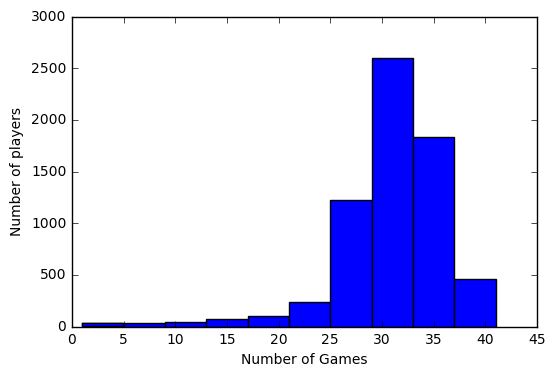

In [69]:
plt.hist(college_clean.G)
plt.xlabel('Number of Games')
plt.ylabel('Number of players')

In [70]:
temp2 = pd.DataFrame(college_clean.groupby(['Name'])['G'].max()*0.25)
temp2.reset_index(inplace=True)
temp2.columns = ['Name','Threshold']
college_clean = college_clean.merge(temp2, on="Name")
college_clean

,Age,College,G,MP,FG,FGA,3P,3PA,FT,FTA,...,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season,Name,Threshold
0,19.0,TEXAS,34,1003.0,159.0,368.0,42.0,112.0,36.0,66.0,...,0.432,0.375,0.545,29.5,11.6,2.9,2.1,2009-10,b/bradlav01,8.50
1,19.0,MICHIGAN,31,403.0,34.0,56.0,0.0,1.0,16.0,35.0,...,0.607,0.000,0.457,13.0,2.7,3.3,0.5,1989-90,r/rileyer01,8.75
2,20.0,MICHIGAN,28,840.0,105.0,235.0,0.0,1.0,87.0,115.0,...,0.447,0.000,0.757,30.0,10.6,8.6,1.0,1990-91,r/rileyer01,8.75
3,21.0,MICHIGAN,32,480.0,82.0,139.0,NaN,NaN,37.0,64.0,...,0.590,NaN,0.578,15.0,6.3,4.3,0.7,1991-92,r/rileyer01,8.75
4,22.0,MICHIGAN,35,525.0,78.0,133.0,0.0,2.0,39.0,53.0,...,0.586,0.000,0.736,15.0,5.6,4.8,0.4,1992-93,r/rileyer01,8.75
5,18.0,NEASTERN,32,1030.0,236.0,447.0,NaN,NaN,99.0,144.0,...,0.528,NaN,0.688,32.2,17.8,6.2,1.5,1983-84,l/lewisre01,8.00
6,19.0,NEASTERN,31,1082.0,294.0,585.0,NaN,NaN,159.0,213.0,...,0.503,NaN,0.746,34.9,24.1,7.8,1.8,1984-85,l/lewisre01,8.00
7,20.0,NEASTERN,30,1118.0,265.0,559.0,NaN,NaN,184.0,229.0,...,0.474,NaN,0.803,37.3,23.8,9.3,2.2,1985-86,l/lewisre01,8.00
8,21.0,NEASTERN,29,957.0,248.0,507.0,30.0,91.0,150.0,197.0,...,0.489,0.330,0.761,33.0,23.3,8.5,1.5,1986-87,l/lewisre01,8.00
9,19.0,LONGBEACH,32,945.0,147.0,342.0,45.0,136.0,118.0,170.0,...,0.430,0.331,0.694,29.5,14.3,4.8,1.6,1989-90,h/harrilu01,8.00


In [71]:
college_clean = college_clean[college_clean.G >= college_clean.Threshold]
college_clean

,Age,College,G,MP,FG,FGA,3P,3PA,FT,FTA,...,FG%,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season,Name,Threshold
0,19.0,TEXAS,34,1003.0,159.0,368.0,42.0,112.0,36.0,66.0,...,0.432,0.375,0.545,29.5,11.6,2.9,2.1,2009-10,b/bradlav01,8.50
1,19.0,MICHIGAN,31,403.0,34.0,56.0,0.0,1.0,16.0,35.0,...,0.607,0.000,0.457,13.0,2.7,3.3,0.5,1989-90,r/rileyer01,8.75
2,20.0,MICHIGAN,28,840.0,105.0,235.0,0.0,1.0,87.0,115.0,...,0.447,0.000,0.757,30.0,10.6,8.6,1.0,1990-91,r/rileyer01,8.75
3,21.0,MICHIGAN,32,480.0,82.0,139.0,NaN,NaN,37.0,64.0,...,0.590,NaN,0.578,15.0,6.3,4.3,0.7,1991-92,r/rileyer01,8.75
4,22.0,MICHIGAN,35,525.0,78.0,133.0,0.0,2.0,39.0,53.0,...,0.586,0.000,0.736,15.0,5.6,4.8,0.4,1992-93,r/rileyer01,8.75
5,18.0,NEASTERN,32,1030.0,236.0,447.0,NaN,NaN,99.0,144.0,...,0.528,NaN,0.688,32.2,17.8,6.2,1.5,1983-84,l/lewisre01,8.00
6,19.0,NEASTERN,31,1082.0,294.0,585.0,NaN,NaN,159.0,213.0,...,0.503,NaN,0.746,34.9,24.1,7.8,1.8,1984-85,l/lewisre01,8.00
7,20.0,NEASTERN,30,1118.0,265.0,559.0,NaN,NaN,184.0,229.0,...,0.474,NaN,0.803,37.3,23.8,9.3,2.2,1985-86,l/lewisre01,8.00
8,21.0,NEASTERN,29,957.0,248.0,507.0,30.0,91.0,150.0,197.0,...,0.489,0.330,0.761,33.0,23.3,8.5,1.5,1986-87,l/lewisre01,8.00
9,19.0,LONGBEACH,32,945.0,147.0,342.0,45.0,136.0,118.0,170.0,...,0.430,0.331,0.694,29.5,14.3,4.8,1.6,1989-90,h/harrilu01,8.00


In [72]:
sum(college_clean.G >= college_clean.Threshold) == college_clean.shape[0]

True

### Calculate FT, FTA, FGA, 3PA, STL, BLK, TOV per game

In [73]:
college_clean["FT"] = college_clean["FT"]/college_clean["G"]
college_clean["FTA"] = college_clean["FTA"]/college_clean["G"]
college_clean["FGA"] = college_clean["FGA"]/college_clean["G"]
college_clean["3PA"] = college_clean["3PA"]/college_clean["G"]
college_clean["STL"] = college_clean["STL"]/college_clean["G"]
college_clean["BLK"] = college_clean["BLK"]/college_clean["G"]
college_clean["TOV"] = college_clean["TOV"]/college_clean["G"]
college_clean["ORB"] = college_clean["ORB"]/college_clean["G"]
college_clean["PF"] = college_clean["PF"]/college_clean["G"]

/home/nitu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/nitu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nitu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

### Calcuate number of actual years played by length

In [74]:
temp3 = pd.DataFrame(college_clean.groupby(['Name'])['G'].count())
temp3.reset_index(inplace=True)
temp3.columns = ['Name','Years']
temp3
college_clean = college_clean.merge(temp3, on="Name")
college_clean

,Age,College,G,MP,FG,FGA,3P,3PA,FT,FTA,...,3P%,FT%,MP.1,PTS.1,TRB.1,AST.1,Season,Name,Threshold,Years
0,19.0,TEXAS,34,1003.0,159.0,10.823529,42.0,3.294118,1.058824,1.941176,...,0.375,0.545,29.5,11.6,2.9,2.1,2009-10,b/bradlav01,8.50,1
1,19.0,MICHIGAN,31,403.0,34.0,1.806452,0.0,0.032258,0.516129,1.129032,...,0.000,0.457,13.0,2.7,3.3,0.5,1989-90,r/rileyer01,8.75,4
2,20.0,MICHIGAN,28,840.0,105.0,8.392857,0.0,0.035714,3.107143,4.107143,...,0.000,0.757,30.0,10.6,8.6,1.0,1990-91,r/rileyer01,8.75,4
3,21.0,MICHIGAN,32,480.0,82.0,4.343750,NaN,NaN,1.156250,2.000000,...,NaN,0.578,15.0,6.3,4.3,0.7,1991-92,r/rileyer01,8.75,4
4,22.0,MICHIGAN,35,525.0,78.0,3.800000,0.0,0.057143,1.114286,1.514286,...,0.000,0.736,15.0,5.6,4.8,0.4,1992-93,r/rileyer01,8.75,4
5,18.0,NEASTERN,32,1030.0,236.0,13.968750,NaN,NaN,3.093750,4.500000,...,NaN,0.688,32.2,17.8,6.2,1.5,1983-84,l/lewisre01,8.00,4
6,19.0,NEASTERN,31,1082.0,294.0,18.870968,NaN,NaN,5.129032,6.870968,...,NaN,0.746,34.9,24.1,7.8,1.8,1984-85,l/lewisre01,8.00,4
7,20.0,NEASTERN,30,1118.0,265.0,18.633333,NaN,NaN,6.133333,7.633333,...,NaN,0.803,37.3,23.8,9.3,2.2,1985-86,l/lewisre01,8.00,4
8,21.0,NEASTERN,29,957.0,248.0,17.482759,30.0,3.137931,5.172414,6.793103,...,0.330,0.761,33.0,23.3,8.5,1.5,1986-87,l/lewisre01,8.00,4
9,19.0,LONGBEACH,32,945.0,147.0,10.687500,45.0,4.250000,3.687500,5.312500,...,0.331,0.694,29.5,14.3,4.8,1.6,1989-90,h/harrilu01,8.00,4


### Missing Variables

In [75]:
print sum(np.isnan(college_clean["MP"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["3P"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["TOV"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["FGA"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["FG"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["FTA"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["FT"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["STL"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["BLK"]) == True)/float(len(college_clean))
print sum(np.isnan(college_clean["PTS"]) == True)/float(len(college_clean))

SyntaxError: invalid syntax (<ipython-input-75-3af49539c41b>, line 1)

### Calculate VOP

VOP    = lg_PTS / (lg_FGA - lg_ORB + lg_TOV + 0.44 * lg_FTA)

### Calculate PER

uPER = (1 / MP) *
     [ 3P
     + (2/3) * AST
     + (2 - factor * (team_AST / team_FG)) * FG
     + (FT *0.5 * (1 + (1 - (team_AST / team_FG)) + (2/3) * (team_AST / team_FG)))
     - VOP * TOV
     - VOP * DRB% * (FGA - FG)
     - VOP * 0.44 * (0.44 + (0.56 * DRB%)) * (FTA - FT)
     + VOP * (1 - DRB%) * (TRB - ORB)
     + VOP * DRB% * ORB
     + VOP * STL
     + VOP * DRB% * BLK
     - PF * ((lg_FT / lg_PF) - 0.44 * (lg_FTA / lg_PF) * VOP) ]

### Calculate DRB% = (lg_TRB - lg_ORB) / lg_TRB

In [76]:
# college_clean["DRB"] = (np.log(college_clean["TRB"]) - np.log(college_clean["ORB"])) / np.log(college_clean["TRB"])
# print sum(np.isnan(college_clean["TRB"]) == True)/float(len(college_clean))
# print sum(np.isnan(college_clean["ORB"]) == True)/float(len(college_clean))
# college_clean["DRB"].fillna(np.mean(college_clean["DRB"]),inplace=True)
# print sum(np.isnan(college_clean["DRB"]) == True)/float(len(college_clean))

In [77]:
def AP_data_scraper(url):
    ## scrape the college table
    req = requests.get(url)
    text = req.text
    soup = BeautifulSoup(text, "html.parser")
    table = soup.find('table', id = 'ad')
    
    column_headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]
    
    ## extract contents from the table
    data_rows = soup.findAll('tr')[2:27]  # skip the first two columns and til 25 rows
    cells = [[td.getText() for td in data_rows[i].findAll('td')] 
               for i in range(len(data_rows))]
    
    ## combine the columns and data as a data frame
    df = pd.DataFrame(cells, columns=column_headers[1:])
    return(df)

### Scrape NCAA AP Poll

In [24]:
AP_poll_schools = defaultdict(list)

for i in range(2016, 1988, -1):
    url = "http://www.sports-reference.com/cbb/seasons/" + str(i) + "-polls.html"
    df = AP_data_scraper(url)
    
    names = np.array(df['School'].values.astype(str))
    for n in names:
        n = str.split(n, '\xa0*')[0]
        AP_poll_schools[i].append(n)

In [44]:
for colleges in AP_poll_schools.items():
    new = []
    for college in colleges[1]:
        new.append(college.upper())
    AP_poll_schools[colleges[0]] = new

In [78]:
AP = []
season = college_clean['Season'].values
school = college_clean['College'].values
for i in range(len(season)):
    year = int(season[i][:4]) + 1
    if school[i] in AP_poll_schools[year]:
        AP.append(1)
    else:
        AP.append(0)
college_clean['AP'] = AP

### Get Measurement Data

In [195]:
df = pd.read_csv('Dataset/Measurement.csv')

In [196]:
player_measurement_raw = {}
for name in df.PLAYER.astype(str):
    info = list(df[df['PLAYER'] == name].values[0,2:])
    for i in range(len(info)):
        if info[i] == '-':
            info[i] = np.nan
        else:
            info[i] = float(info[i])
    player_measurement_raw[name] = info

In [197]:
len(player_measurement_raw)

1011

In [198]:
player_measurement = {}
for name in player_info.keys():
    idx = name.find('\\')
    if name[:idx] in player_measurement_raw:
        player_measurement[name[idx+1:]] = player_measurement_raw[name[:idx]]

In [199]:
player_measurement

{'ackeral01': [11.67, nan, 3.35, 28.0, 32.0, 11.0],
 'acyqu01': [10.48, nan, 3.28, 32.0, 37.0, 13.0],
 'adamsjo01': [12.13, 3.05, 3.5, 24.5, 29.5, nan],
 'adamsst01': [11.85, 3.02, 3.4, 28.5, 33.0, 16.0],
 'adrieje01': [11.34, nan, 3.32, 27.5, 31.5, 16.0],
 'agerma01': [11.73, nan, 3.22, 29.5, 35.0, 11.0],
 'alabiso01': [13.2, nan, 3.68, 22.5, 26.0, 10.0],
 'aldrico01': [11.48, nan, 3.35, 23.0, 28.0, 10.0],
 'aldrila01': [12.02, nan, 3.43, 26.5, 34.0, 8.0],
 'alexacl01': [nan, nan, nan, nan, nan, nan],
 'alexajo01': [11.33, nan, 2.99, 32.5, 38.5, 24.0],
 'allenma01': [11.83, nan, 3.38, 25.5, 29.0, 13.0],
 'allento01': [10.7, nan, 3.19, 31.5, 36.5, 17.0],
 'almonmo01': [11.45, nan, 3.19, 31.0, 35.5, 13.0],
 'aminual01': [11.29, nan, 3.3, 27.0, 33.5, 13.0],
 'amundlo01': [10.58, nan, 3.2, 32.0, 35.5, 14.0],
 'anderal01': [10.32, nan, 3.27, 26.5, 30.5, 10.0],
 'anderja01': [11.86, nan, 3.19, 30.0, 35.5, 14.0],
 'anderju01': [11.13, 2.88, 3.22, 38.0, 43.0, 12.0],
 'anderky01': [nan, nan, n

In [84]:
tmp = college_clean['Name'].values
for i in range(len(tmp)):
    tmp[i] = tmp[i][2:]
college_clean['Name'] = tmp

In [200]:
college_clean['LAT'] = [np.nan] * len(college_clean)
college_clean['SR'] = [np.nan] * len(college_clean)
college_clean['TQS'] = [np.nan] * len(college_clean)
college_clean['SVL'] = [np.nan] * len(college_clean)
college_clean['MVL'] = [np.nan] * len(college_clean)
college_clean['MBP'] = [np.nan] * len(college_clean)

In [201]:
for name in college_clean['Name'].unique():
    if name in player_measurement:
        idx = college_clean[college_clean['Name'] == name].index.tolist()
        college_clean.loc[idx, ['LAT', 'SR', 'TQS', 'SVL', 'MVL', 'MBP']] = player_measurement[name]

### Summarize each player data into one row

In [203]:
college_average = pd.DataFrame(college_clean.groupby('Name').mean()).reset_index()
college_average.columns

Index(['Name', 'Age', 'G', 'MP', 'FG', 'FGA', '3P', '3PA', 'FT', 'FTA', 'ORB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'FG%', '3P%', 'FT%',
       'MP.1', 'PTS.1', 'TRB.1', 'AST.1', 'Threshold', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP'],
      dtype='object')

In [204]:
college_average[['Name','G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK', 'TOV', 'PF', 'MP.1','PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP']]

,Name,G,FGA,3PA,FTA,ORB,TRB.1,AST.1,STL,BLK,...,3P%,FT%,Years,AP,LAT,SR,TQS,SVL,MVL,MBP
0,abdelal01,33.500000,5.375016,NaN,2.340140,NaN,3.525000,0.325000,0.351910,0.484922,...,NaN,0.674000,4.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN
1,abdulma02,32.000000,21.890625,7.218750,6.406250,NaN,2.950000,3.650000,1.671875,0.109375,...,0.373500,0.862500,2.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
2,abdulta01,27.666667,11.285641,1.922756,4.859071,NaN,5.800000,1.400000,1.020833,0.599423,...,0.309667,0.678667,3.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN
3,abdursh01,28.000000,14.214286,0.750000,8.892857,NaN,8.400000,1.000000,1.857143,1.250000,...,0.381000,0.683000,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,ackeral01,29.333333,11.107461,3.282642,3.524432,NaN,5.600000,2.800000,1.515493,0.430174,...,0.408333,0.822000,3.0,0.000000,11.67,NaN,3.35,28.0,32.0,11.0
5,acresma01,27.500000,12.562309,NaN,5.803502,NaN,9.475000,NaN,1.376778,1.501394,...,NaN,0.697250,4.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
6,acyqu01,34.750000,6.030138,0.049024,3.591711,2.405757,5.925000,0.625000,0.736601,1.267874,...,0.300000,0.688000,4.0,0.500000,10.48,NaN,3.28,32.0,37.0,13.0
7,adamsha01,32.500000,11.632398,1.905359,2.685259,NaN,5.425000,1.975000,1.830632,0.672025,...,0.288500,0.711250,4.0,0.750000,NaN,NaN,NaN,NaN,NaN,NaN
8,adamsjo01,34.500000,11.549242,4.300505,4.943182,1.248737,4.550000,2.050000,2.425505,0.251263,...,0.331500,0.839500,2.0,1.000000,12.13,3.05,3.50,24.5,29.5,NaN
9,adamsmi01,29.750000,11.060092,NaN,4.206112,NaN,2.650000,3.875000,2.264196,0.102788,...,NaN,0.725750,4.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
